# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# lendo o arquivo

df = pd.read_csv('/kaggle/input/dados-sinasc/dados_SINASC.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

<Axes: xlabel='apgar5_cat', ylabel='count'>

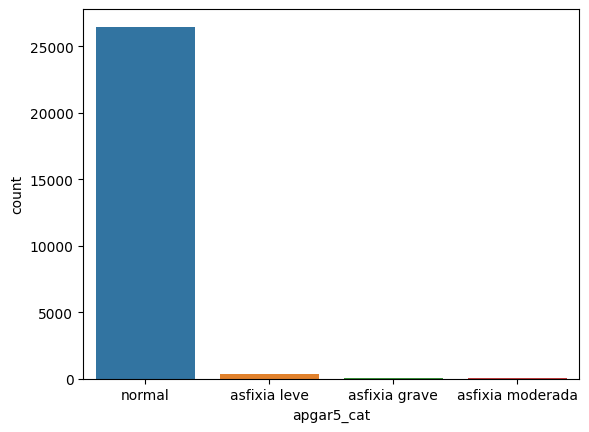

In [10]:
# criando uma nova coluna com a caregorizaçao solicitada 

df.loc[df['APGAR5'] >= 8, 'apgar5_cat'] = 'normal'
df.loc[(df['APGAR5'] >=6) & (df['APGAR5'] <= 7),'apgar5_cat'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5),'apgar5_cat'] = 'asfixia moderada'
df.loc[(df['APGAR5'] <= 3), 'apgar5_cat'] = 'asfixia grave'

# exibe o grafico com as novas quebras

sns.countplot(x = 'apgar5_cat', data = df)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '42 semanas e mais'),
  Text(2, 0, '32 a 36 semanas'),
  Text(3, 0, '22 a 27 semanas'),
  Text(4, 0, '28 a 31 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

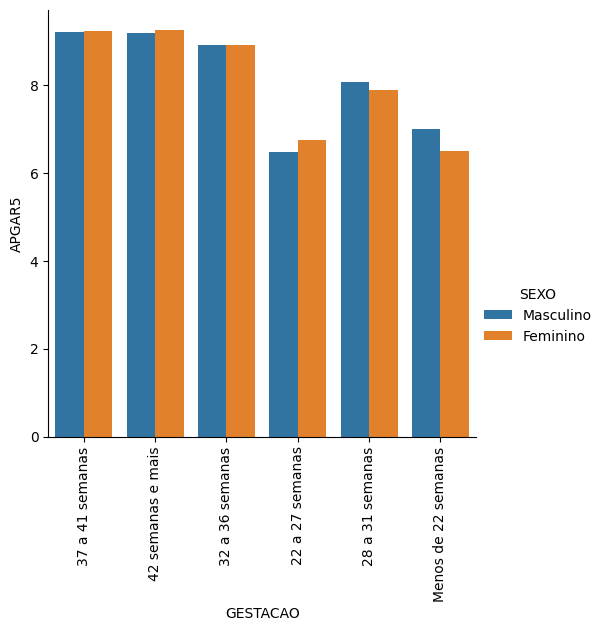

In [24]:
sns.catplot(x ='GESTACAO',y='APGAR5',  #Variaveis analisadas
            hue = 'SEXO',    #separadas pelo SEXO
            kind = 'bar',    # tipo de barra
            data = df,       # dataset
            errorbar = None) # sugerido pelo kaggle substituindo o ci = NONE

plt.xticks(rotation=90) #rotaciona o eixo X em 90 graus

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [25]:
# cruzando os dados em uma tabela pelo crosstab()

tab_cruz = pd.crosstab(df['GESTACAO'],df['APGAR5']) #GESTACAO nas linhas e o APGAR nas colunas

tab_cruz # exibe a tabela

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [26]:
# Calcular a frenquencia do percentual por linha
fr_pc_lin = tab_cruz.div(tab_cruz.sum(axis =1), axis =0) 
fr_pc_lin   # exibe a nova tabela com os percentuais

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

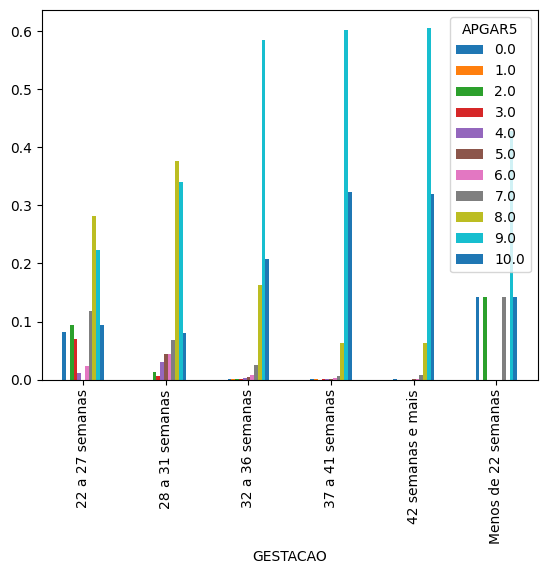

In [27]:
# plot do grafico referente a tabela de percentuais

fr_pc_lin.plot.bar()

Analisando o grafico acima, eu pude concluir que apenas as gestações inferiores a 32 semanas que começam a apresentar um certo risco em maiores porporções. Analisando especificamente o intervalo da semana 32 a 36 semanas é possivel perceber que mesmo sendo considerado prematuro pelos médicos, aproximadamente 94% dos bebês nasceram com o APGAR = 'Normal', então por essa analise não corrobora com a opnião dos médicos

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'asfixia leve'),
  Text(2, 0, 'asfixia grave'),
  Text(3, 0, 'asfixia moderada')])

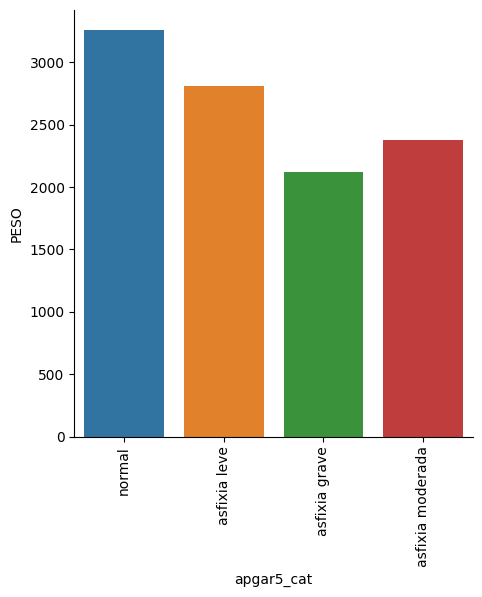

In [30]:
#verificando relação entre o peso do bebe com a variavel APGAR

sns.catplot(x='apgar5_cat',y='PESO',
           kind = 'bar',
           data = df,
           errorbar = None)
plt.xticks(rotation=90) #rotaciona o eixo X em 90 graus

Por esse grafico já ficou evidente que crianças que nasceram com o peso menor, tiveram uma maior probabilidade de contrairem asfixia grave. E a medida que o peso vai aumentando, ela vai passando pelos estagios de moderada, leve ate atingir o normal. Sendo assim crianças que nasceram com mais de 3kg em sua media não tiveram problemas com asfixia.

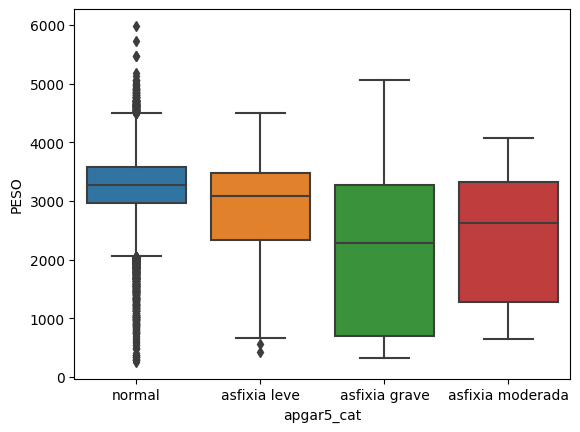

In [31]:
#verificando por outros tipos de graficos

ax = sns.boxplot(data = df, y ='PESO', x = 'apgar5_cat')

Por esse outro grafico podemos perceber que nem todas as criancas que nascem com um peso 'normal'está isenta de problemas com asfixia, porém é evidente que o peso tem sim uma influencia em relação a criança ter asfixia grave. Cheguei a verificar atraves de graficos do tipo de dispersão mas as informações não foram eficientes para análise.